In [1]:
import numpy as np 
import pandas as pd

In [2]:
#Load Dataset
data=pd.read_csv('./RickAndMortyScripts.csv')
data.head(3)

,index,season no.,episode no.,episode name,name,line
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...
1,1,1,1,Pilot,Morty,"What, Rick? What’s going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."


In [3]:
# Word Count
data['words-line']=data['line'].apply(lambda x: len(str(x).split(" ")))
data[['line','words-line']].head()

,line,words-line
0,Morty! You gotta come on. Jus'... you gotta co...,11
1,"What, Rick? What’s going on?",5
2,"I got a surprise for you, Morty.",7
3,It's the middle of the night. What are you tal...,11
4,"Come on, I got a surprise for you. Come on, h...",13


In [4]:
# Character Count
data['char-count']=data['line'].str.len()
data[['line','char-count']].head()

,line,char-count
0,Morty! You gotta come on. Jus'... you gotta co...,57
1,"What, Rick? What’s going on?",28
2,"I got a surprise for you, Morty.",32
3,It's the middle of the night. What are you tal...,57
4,"Come on, I got a surprise for you. Come on, h...",54


In [5]:
# Remove Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

data['line']=data['line'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['line'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Durmus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    Morty! You gotta come on. Jus'... gotta come me.
1                        What, Rick? What’s going on?
2                          I got surprise you, Morty.
3              It's middle night. What talking about?
4     Come on, I got surprise you. Come on, hurry up.
Name: line, dtype: object

In [6]:
# Lower casing
data['line']=data['line'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['line'].head()

0    morty! you gotta come on. jus'... gotta come me.
1                        what, rick? what’s going on?
2                          i got surprise you, morty.
3              it's middle night. what talking about?
4     come on, i got surprise you. come on, hurry up.
Name: line, dtype: object

In [8]:
# Displays third row on line - tokenizing
data["line"][3]

"it's middle night. what talking about?"

In [9]:
# Tokenization
import nltk
nltk.word_tokenize(data["line"][3])

['it', "'s", 'middle', 'night', '.', 'what', 'talking', 'about', '?']

In [10]:
# Create a word cloud 
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

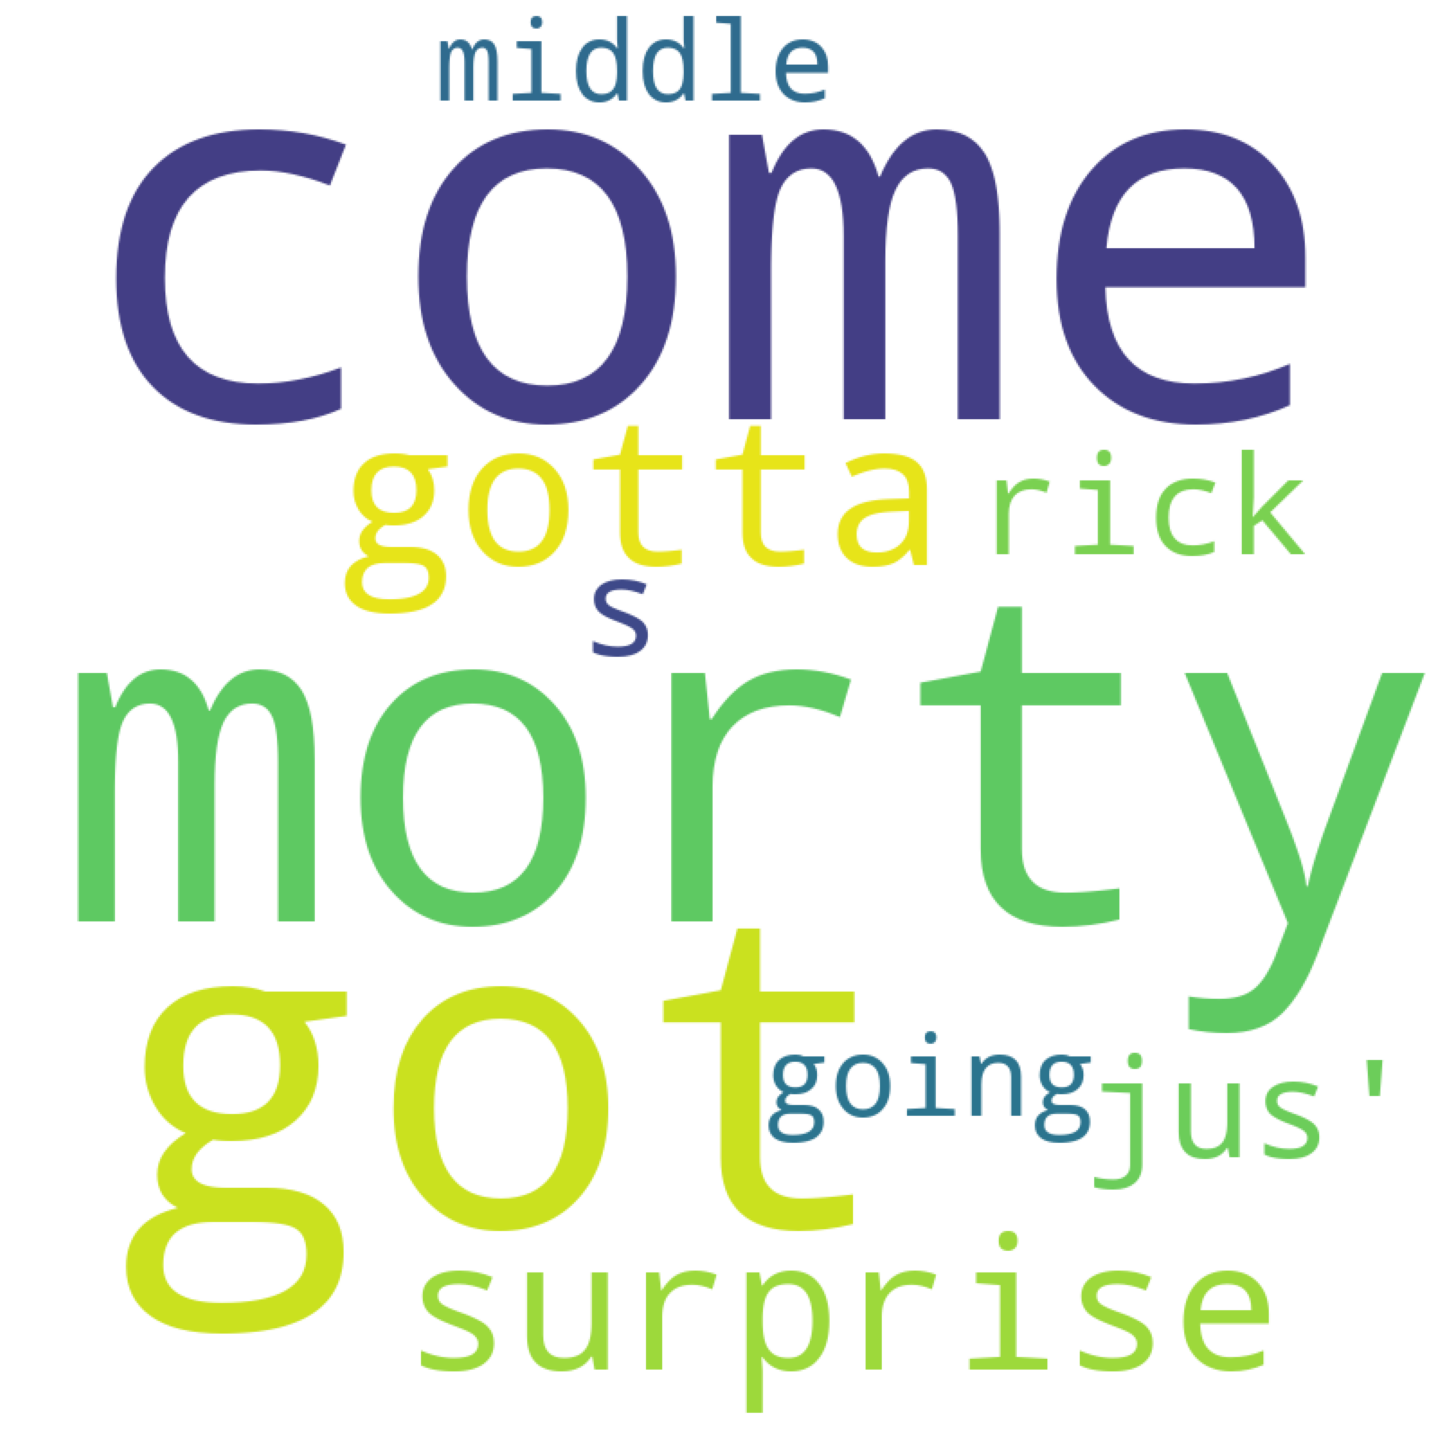

In [11]:
# Create a word cloud 
text=data['line']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                max_words=10).generate(str(text))
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20), facecolor = 'None')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [12]:
#Create a DTM 
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize
cv = CountVectorizer()

In [13]:
text2=data["line"]
text2

0        morty! you gotta come on. jus'... gotta come me.
1                            what, rick? what’s going on?
2                              i got surprise you, morty.
3                  it's middle night. what talking about?
4         come on, i got surprise you. come on, hurry up.
                              ...                        
1900                                        that amazing!
1901                                    got mermaid puss!
1902    i'm really hoping one-off thing i see again. b...
1903    pssh! not all, morty. that place never bearing...
1904                       whoo! yeah! yeaah! ohhh, shit!
Name: line, Length: 1905, dtype: object

In [14]:
DTM = "it's middle night. what talking about?"

sentences = tokenize.sent_tokenize(DTM)
sentences

["it's middle night.", 'what talking about?']

In [15]:
X = cv.fit(sentences)
print(X.vocabulary_)

{'it': 1, 'middle': 2, 'night': 3, 'what': 5, 'talking': 4, 'about': 0}


In [16]:
X=cv.transform(sentences)
print(X.toarray())

[[0 1 1 1 0 0]
 [1 0 0 0 1 1]]


In [17]:
df=pd.DataFrame(X.toarray(), columns = cv.get_feature_names())


In [18]:
df

,about,it,middle,night,talking,what
0,0,1,1,1,0,0
1,1,0,0,0,1,1


In [19]:
# 10 most frequent words in line column
freqword = pd.Series(' '.join(data['line']).split()).value_counts()[:10]
freqword

i         651
you       177
morty.    150
i'm       146
get       134
oh,       129
gonna     112
know      105
what       89
like       88
dtype: int64